In [8]:
!pip install matplotlib Pillow

### 1. Resize images to 416x416

In [2]:
import os

DATASET = os.path.abspath(os.path.join("..", "datasets", "purr.dataset"))
os.listdir(DATASET)

['20190329_145702.jpg',
 '20190329_145702.txt',
 '20190424_154950.jpg',
 '20190424_154950.txt',
 '20190424_154952.jpg',
 '20190424_154952.txt',
 '20190424_155001.jpg',
 '20190424_155001.txt',
 '20190608_141605.jpg',
 '20190608_141605.txt',
 '20190608_141615.jpg',
 '20190608_141615.txt',
 '20190608_141622.jpg',
 '20190608_141622.txt',
 '20190609_210453.jpg',
 '20190609_210453.txt',
 '20190610_150954.jpg',
 '20190610_150954.txt',
 '20200527_133706.jpg',
 '20200527_133706.txt',
 '20200527_133713.jpg',
 '20200527_133713.txt',
 '20200814_220657.jpg',
 '20200814_220657.txt',
 '20200814_221828.jpg',
 '20200814_221828.txt',
 '20200814_222756.jpg',
 '20200814_222756.txt',
 '20200814_230657.jpg',
 '20200814_230657.txt',
 '20200814_230659.jpg',
 '20200814_230659.txt',
 'IMG-20230922-WA0044.jpg',
 'IMG-20230922-WA0044.txt',
 'IMG_20210403_232643.jpg',
 'IMG_20210403_232643.txt',
 'IMG_20210403_232647.jpg',
 'IMG_20210403_232647.txt',
 'IMG_20210404_214212.jpg',
 'IMG_20210404_214212.txt',
 'IMG_20

In [23]:
# Remove non-image files
non_images = [f for f in os.listdir(DATASET) if not f.endswith(".jpg")]
for f in non_images:
    os.remove(os.path.join(DATASET, f))

# Resize and pad the images
if os.path.exists(DATASET):
    import cv2

    def resize_and_pad(img, size: int = 416):
        h, w = img.shape[:2]
        scale = size / max(h, w)
        new_h, new_w = int(h * scale), int(w * scale)
        resized_img = cv2.resize(img, (new_w, new_h))

        top = (size - new_h) // 2
        bottom = size - new_h - top
        left = (size - new_w) // 2
        right = size - new_w - left

        # Pad the resized image with black pixels
        padded_img = cv2.copyMakeBorder(resized_img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

        return padded_img

    for img in [img for img in os.listdir(DATASET)]:
        image = cv2.imread(os.path.join(DATASET, img))
        processed_image = resize_and_pad(image)
        cv2.imwrite(os.path.join(DATASET, img), processed_image)

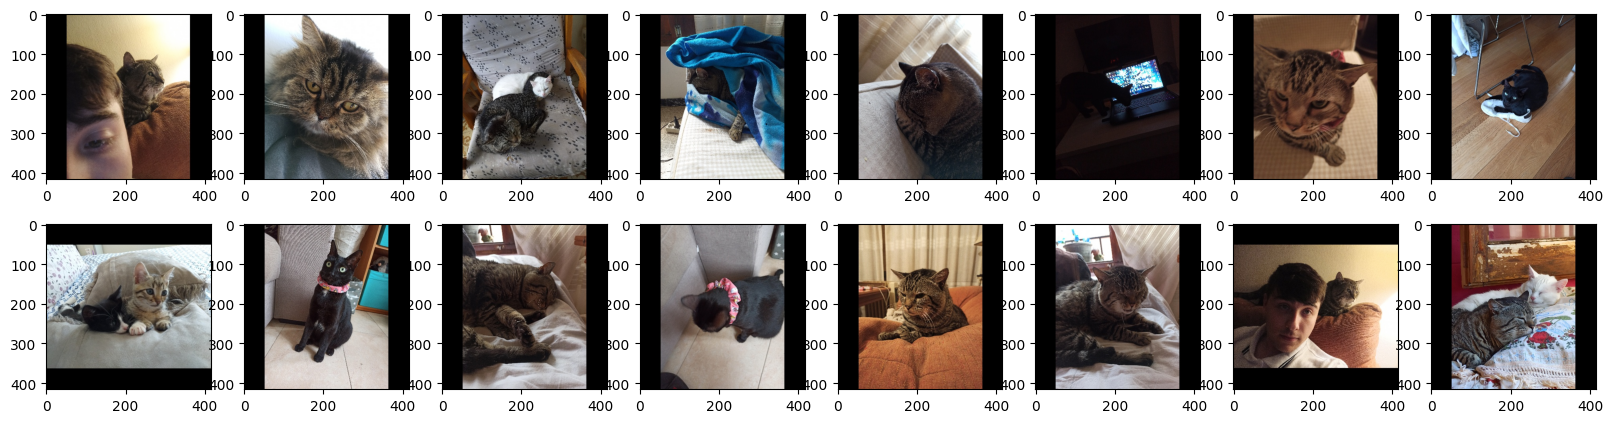

In [27]:
import random
import matplotlib.pyplot as plt

# Display some random images from the dataset
random_imgs = random.sample(os.listdir(DATASET), 16)
fig, axs = plt.subplots(2, 8, figsize=(20, 5))
for i in range(2):
    for j in range(8):
        axs[i, j].imshow(plt.imread(os.path.join(DATASET, random_imgs[i * 8 + j])))

plt.show()

### 2. Annotate the images

If labelImg raises some float related errors, it can be fixed with the following process.

https://github.com/HumanSignal/labelImg/issues/938#issuecomment-1309053944

In [ ]:
%pip install labelImg==1.8.1

In [ ]:
!labelImg

### 3. Organize the files in dataset

In [5]:
import os

os.mkdir(os.path.join(DATASET, "train"))
os.mkdir(os.path.join(DATASET, "train", "images"))
os.mkdir(os.path.join(DATASET, "train", "labels"))
os.mkdir(os.path.join(DATASET, "valid"))
os.mkdir(os.path.join(DATASET, "valid", "images"))
os.mkdir(os.path.join(DATASET, "valid", "labels"))

for i, filename in enumerate([f for f in os.listdir(DATASET) if f.endswith('.jpg')]):
    folder = 'valid' if i % 5 == 0 else 'train'
    os.rename(os.path.join(DATASET, filename), os.path.join(DATASET, folder, 'images', filename))
    label_file = filename.replace(".jpg", ".txt")
    os.rename(os.path.join(DATASET, label_file), os.path.join(DATASET, folder, 'labels', label_file))